In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from scipy.optimize import curve_fit
from scipy.special import erf

In [3]:
N = 1453477594

In [4]:
data_path = Path().resolve().parent.parent / "data"
vaccination = (
    pd.read_excel(data_path / "china_covid_vaccination.xlsx")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)
vaccination.head()

,location,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,
2020-12-15,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.gov.cn/xinwen/gwylflkjz143/index.htm,1500000,NaN,NaN,NaN
2020-12-31,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.gov.cn/xinwen/gwylflkjz143/index.htm,4500000,NaN,NaN,NaN
2021-01-09,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.gov.cn/xinwen/gwylflkjz144/index.htm,9000000,NaN,NaN,NaN
2021-01-13,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.nhc.gov.cn/xcs/s3574/202101/f7958ce...,10000000,NaN,NaN,NaN
2021-01-20,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.nhc.gov.cn/xcs/s3574/202101/ed502e6...,15000000,NaN,NaN,NaN


In [5]:
vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,6.760000e+02,4.300000e+01,5.800000e+01,3.900000e+01
mean,2.518185e+09,1.254424e+09,1.194703e+09,6.507759e+08
std,1.104685e+09,1.119065e+08,1.050187e+08,2.457399e+08
min,1.500000e+06,6.220000e+08,7.770460e+08,3.797300e+07
25%,2.000044e+09,1.267303e+09,1.188083e+09,6.541780e+08
50%,3.033148e+09,1.282120e+09,1.240060e+09,7.628970e+08
75%,3.422272e+09,1.293746e+09,1.258688e+09,7.976655e+08
max,3.489514e+09,1.310189e+09,1.276517e+09,8.265310e+08


<AxesSubplot: xlabel='date'>

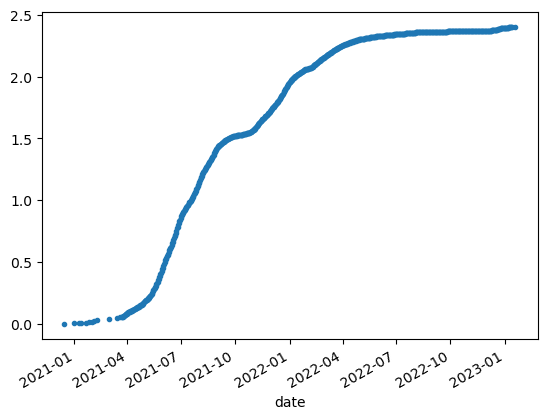

In [6]:
data_V = vaccination["total_vaccinations"].div(N)
data_V.plot(style='.')

<AxesSubplot: xlabel='date'>

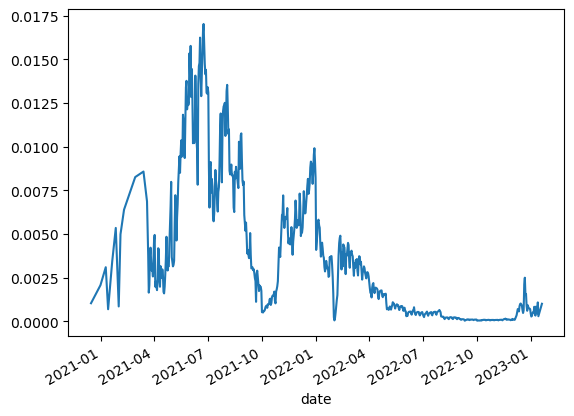

In [7]:
data_dV_dt = vaccination["total_vaccinations"].pipe(lambda s: s.diff().fillna(s).div(N))
data_dV_dt.plot()

<AxesSubplot: xlabel='date'>

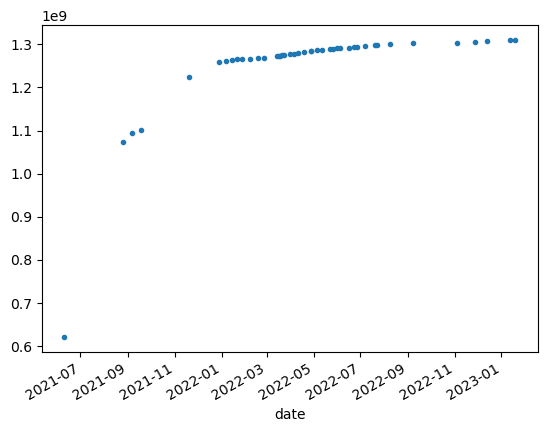

In [8]:
vaccination['people_vaccinated'].plot(style='.')

In [9]:
vacc_df = (
    vaccination.drop(columns=["location", "vaccine", "source_url"])
    .asfreq(freq="D")
    .interpolate(method="linear")
    # .assign(**{"people_vaccinated": lambda x: x[["total_vaccinations", "people_vaccinated"]].min(axis=1)})
    # .fillna(0)
)
vacc_df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,
2020-12-15,1.500000e+06,NaN,NaN,NaN
2020-12-16,1.687500e+06,NaN,NaN,NaN
2020-12-17,1.875000e+06,NaN,NaN,NaN
2020-12-18,2.062500e+06,NaN,NaN,NaN
2020-12-19,2.250000e+06,NaN,NaN,NaN
...,...,...,...,...
2023-01-15,3.488543e+09,1.310136e+09,1.276394e+09,8.261447e+08
2023-01-16,3.488786e+09,1.310149e+09,1.276425e+09,8.262413e+08
2023-01-17,3.489029e+09,1.310162e+09,1.276456e+09,8.263379e+08


In [10]:
vacc_df.iloc[-2].loc["people_vaccinated"]

1310175714.2857144

In [11]:
vacc_df.iloc[-1].loc["people_vaccinated"]

1310189000.0

<AxesSubplot: xlabel='date'>

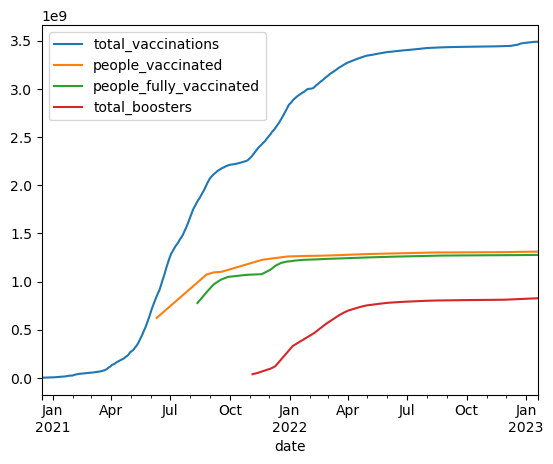

In [12]:
vacc_df.plot()

In [13]:
vacc_df[["total_vaccinations", "people_vaccinated"]].min(axis=1)

date
2020-12-15    1.500000e+06
2020-12-16    1.687500e+06
2020-12-17    1.875000e+06
2020-12-18    2.062500e+06
2020-12-19    2.250000e+06
                  ...     
2023-01-15    1.310136e+09
2023-01-16    1.310149e+09
2023-01-17    1.310162e+09
2023-01-18    1.310176e+09
2023-01-19    1.310189e+09
Freq: D, Length: 766, dtype: float64

<AxesSubplot: xlabel='date'>

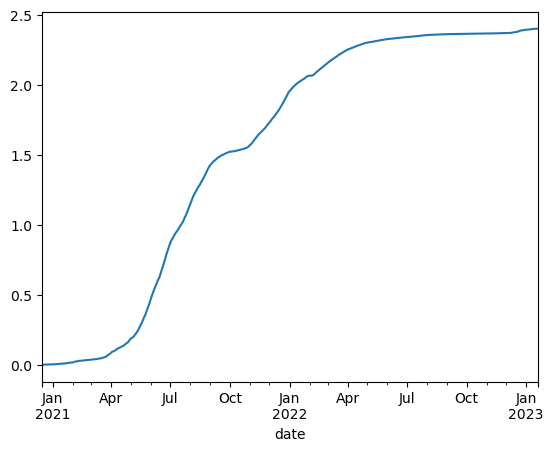

In [14]:
vacc_df["total_vaccinations"].div(N).plot()

<AxesSubplot: xlabel='date'>

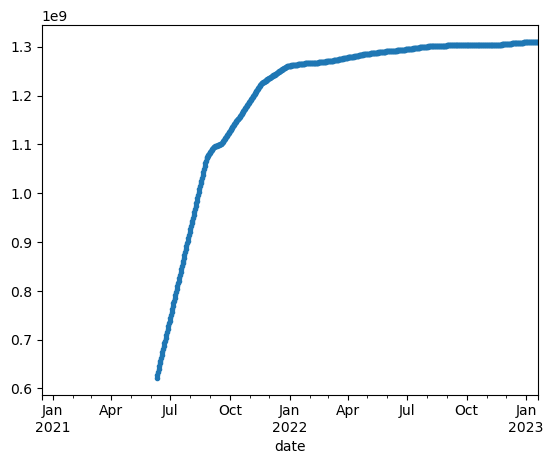

In [15]:
vacc_df["people_vaccinated"].plot(style=".")

In [16]:
aux_day = vaccination.index.min() + pd.Timedelta(5 * 4, unit="W")
vacc_df.loc[aux_day, "people_vaccinated"] = vacc_df.loc[aux_day, "total_vaccinations"]

vacc_df = (
    vacc_df.interpolate(method="linear")
    .assign(**{"people_vaccinated": lambda x: x[["total_vaccinations", "people_vaccinated"]].min(axis=1)})
)
vacc_df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,
2020-12-15,1.500000e+06,1.500000e+06,NaN,NaN
2020-12-16,1.687500e+06,1.687500e+06,NaN,NaN
2020-12-17,1.875000e+06,1.875000e+06,NaN,NaN
2020-12-18,2.062500e+06,2.062500e+06,NaN,NaN
2020-12-19,2.250000e+06,2.250000e+06,NaN,NaN
...,...,...,...,...
2023-01-15,3.488543e+09,1.310136e+09,1.276394e+09,8.261447e+08
2023-01-16,3.488786e+09,1.310149e+09,1.276425e+09,8.262413e+08
2023-01-17,3.489029e+09,1.310162e+09,1.276456e+09,8.263379e+08


<AxesSubplot: xlabel='date'>

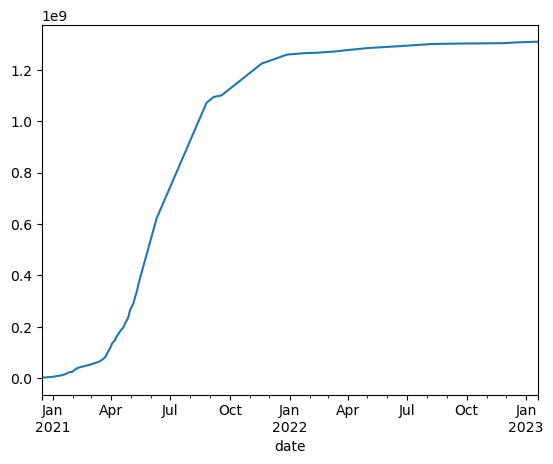

In [17]:
vacc_df["people_vaccinated"].plot()

In [18]:
vacc_df.to_csv("vaccination.csv")

In [19]:
v_array = vacc_df["people_vaccinated"].div(N).values
t_array = np.arange(0, len(v_array))

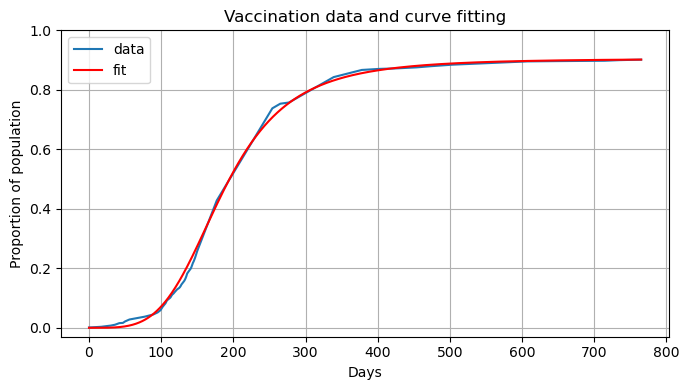

In [45]:
def v_poly(x, v1, v2):
    return v1 * (1 - v2 / (v2 +   x ** 4))

popt, pcov = curve_fit(v_poly, t_array, v_array)
# print(popt)
plt.figure(figsize=(7, 4))
plt.plot(t_array, v_array, label="data")
plt.plot(t_array, v_poly(t_array, *popt), color="red", label="fit")
# plt.scatter(t_array, v_array, s=2, color="red")
plt.legend()
plt.ylim(-0.03, 1)
plt.xlabel("Days")
plt.ylabel("Proportion of population")
plt.title("Vaccination data and curve fitting")
plt.grid()
plt.tight_layout()
plt.savefig("vaccination_fit.png", dpi=300)

In [21]:
# import tensorflow as tf
from math import pi
import tensorflow.compat.v1 as tf
tf.compat.v1.enable_eager_execution()
tf.disable_v2_behavior()
def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return tf.reduce_sum(y[1:]) * dx

a = tf.constant(0, dtype=tf.float64)
b = tf.constant(pi/2, dtype=tf.float64)
x = tf.linspace(a, b, 2**5+1)
result = integral(tf.sin(x), x)

sess = tf.Session()
print(sess.run(result))

2023-06-07 20:06:51.932220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 20:06:52.033857: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-07 20:06:52.457626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/alonsolml/mambaforge/envs/pinn/lib/
2023-06-07 20:06:52.459224: W te

Instructions for updating:
non-resource variables are not supported in the long term


2023-06-07 20:06:52.924590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:52.939450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:52.939498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:52.939922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To e

1.024342886926189


In [22]:
def phi(t, b, c):
    a = 1 / ((c / b) ** (b / (b - c)) - (c / b) ** (c / (b - c)))
    return a * (np.exp(-b * t) - np.exp(-c * t))

def dphi_dt(t, b, c):
    a = 1 / ((c / b) ** (b / (b - c)) - (c / b) ** (c / (b - c)))
    return a * (-b * np.exp(-b * t) + c * np.exp(-c * t))

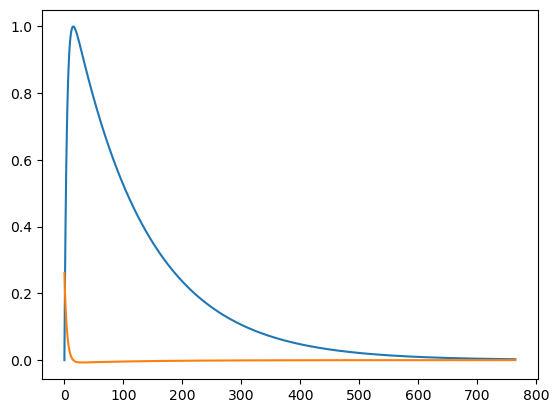

In [23]:
b, c = 0.231, 0.008
plt.plot(t_array, phi(t_array, b, c))
plt.plot(t_array, dphi_dt(t_array, b, c))

In [24]:
integral_values = []
dx = 0.1
for t in t_array:
    nu_array = np.arange(dx, t + dx, dx)
    value = np.sum(dphi_dt(t - nu_array, b, c) * v_poly(nu_array, *popt)) * dx
    integral_values.append(value)

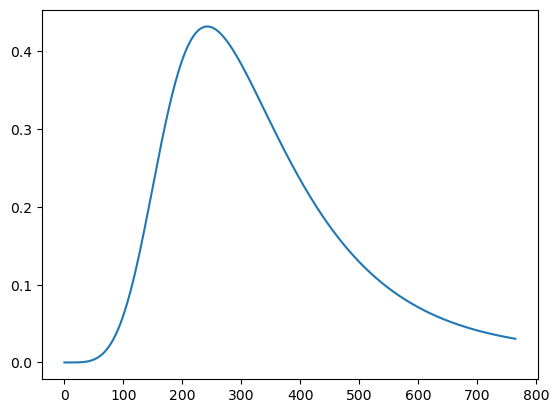

In [25]:
plt.plot(t_array, integral_values)

In [26]:
b_tf = tf.constant(0.231)
c_tf = tf.constant(0.008)
d_tf = tf.constant(1.14473946e+09)

def v_fitted(t, d):
    return 1 - d / (d + t ** 4)

def dv_dt(t, d):
    return (4 * d * t ** 3) / (d + t ** 4) ** 2

def dphi_dt_tf(t, b, c):
    a = 1 / ((c / b) ** (b / (b - c)) - (c / b) ** (c / (b - c)))
    return a * (-b * tf.exp(-b * t) + c * tf.exp(-c * t))

t_tensor = tf.range(0, len(v_array), dtype=float)

@tf.function
def phi_v_integral(t_tensor, b, c, d):
    ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
    ta = ta.unstack([0., 1.])
    dx = tf.constant(0.1)
    for i in range(len(t_tensor)):
        t = t_tensor[i]
        nu_tensor = tf.range(dx, t + dx, dx)
        value = tf.reduce_sum(dphi_dt_tf(t - nu_tensor, b, c) * dv_dt(nu_tensor, d)) * dx
        ta = ta.write(i, value)
    return ta.stack()


result = phi_v_integral(t_tensor, b_tf, c_tf, d_tf)

with tf.Session() as sess:
    result_array = sess.run(result)

2023-06-07 20:06:56.416716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:56.416789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:56.416813: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:56.417233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 20:06:56.417240: I tensorflow/core/co

In [27]:
result_array.shape

(766,)

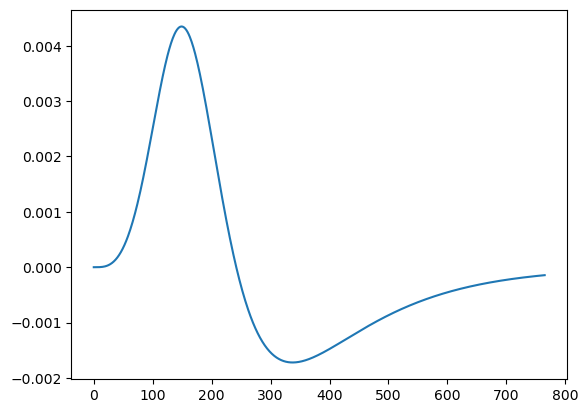

In [28]:
plt.plot(t_array, result_array)